# 直方图均衡化

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

读取图片

(-0.5, 1199.5, 899.5, -0.5)

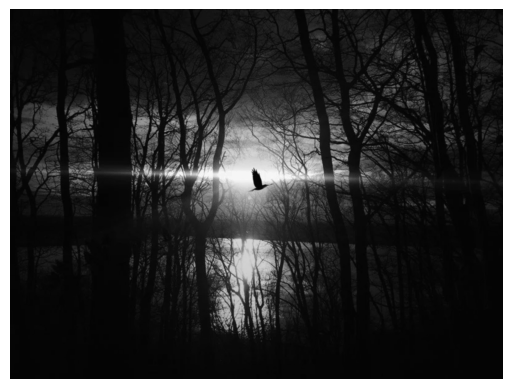

In [9]:
image = cv2.imread('./images/dark.png')    #打开照片               
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)              #建立一个灰度图像
gray = image.copy()                                          #建立一个拷贝图像
plt.imshow(gray,cmap='gray')
plt.axis('off')

In [5]:
[height, width] = [image.shape[0],image.shape[1]]            #提取出高度信息与宽度信息
count = np.zeros(256)                              #因为是概率, 有可能是浮点数
# 统计像素个数并计算概率
for i in range(height):
    for j in range(width):                                   #遍历所有像素点
        depth = image[i, j]
        count[depth] = count[depth] + 1

total = height * width                                       #总像素个数
count = count / total                                        #计算概率(此时的count代表的是像素出现的概率)
count_before = count.copy()                                  #为之后画出直方图做准备

In [ ]:
# 计算映射表
mapl = np.uint16(255 * count)                                #计算映射表

# 将图像进行映射
for i in range(height):
    for j in range(width):                                   #遍历每一个图像             
        depth = image[i, j]
        image[i, j] = mapl[depth]                            #按照映射表计算映射后的图像